*Analisis y visualizacion de datos*

En estapa etapa, hacemos algunas analisis en el dataframe ya preparado anteriormente y posteriormente usamos matplotlib y seaborn para visualizaciones. Ese proyecto también se complementa con dashboards armados en Tableau y Looker Studio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Cargamos el archivo csv que salvamos anteriormente en un dataframe
df = pd.read_csv('netflix_oscar_cleaned.csv')
df.head()

,id_production,id_content,title_production,genre,premiere,runtime,imdb_score,language,type,title_content,...,based_on,starring,distributed_by,budget,budget_x_million,box_office,box_office_x_million,imdb,metascore,rotten_tomatoes
0,1.0,1.0,Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English,Movie,Dick Johnson Is Dead,...,NaN,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0
1,2.0,1093.0,Dolly Parton: A MusiCares Tribute,Documentary,"April 7, 2021",55.0,6.5,English,TV Show,Blood & Water,...,NaN,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0
2,3.0,1071.0,Why Did You Kill Me?,Documentary,"April 14, 2021",83.0,5.6,English,TV Show,Ganglands,...,NaN,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0
3,4.0,142.0,Extraction,Action,"April 24, 2020",117.0,6.7,English,TV Show,Jailbirds New Orleans,...,NaN,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0
4,5.0,3988.0,Antoine Griezmann: The Making of a Legend,Documentary,"March 21, 2019",60.0,6.5,French,TV Show,Kota Factory,...,NaN,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0


Por se tratar de un dataframe con mucha informacion, son varias las historias que se podrían contar usando esta base de datos. Elegimos algunas preguntas claves, pero se puede profundizar o adaptar segun la necesidad del cliente. Se utiliza matplotlib y seaborn para mejor visualizacion

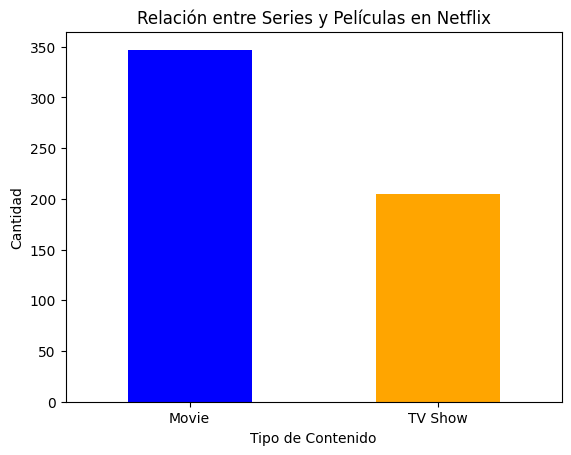

In [9]:
# i. Gráfico de la relación entre la cantidad de series y películas disponibles en Netflix
df_count_type = df.groupby('type').size()
df_count_type.plot(kind='bar', color=['blue', 'orange'])
plt.title('Relación entre Series y Películas en Netflix')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

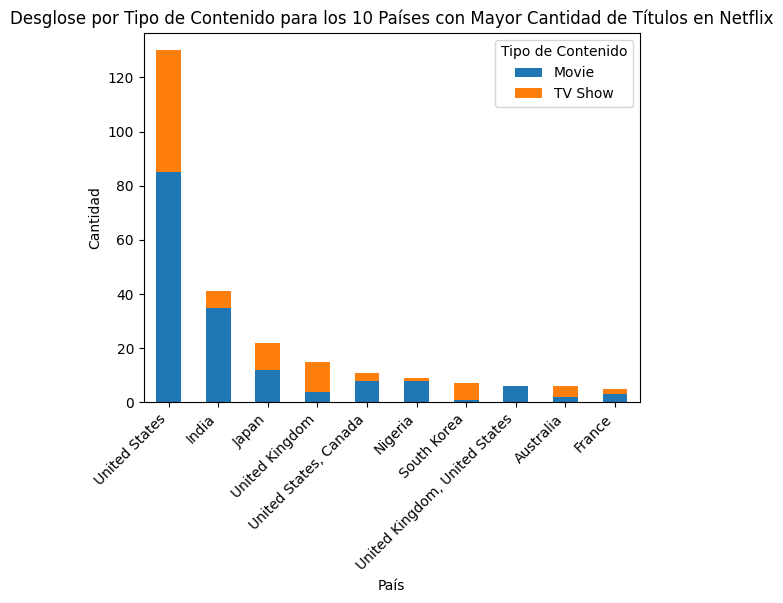

In [10]:
# ii. Gráfico desglosando por tipo de contenido para los 10 países con mayor cantidad de títulos en la plataforma
df_paises_desglose = df.groupby(['country', 'type']).size().unstack()
df_paises_desglose['Total'] = df_paises_desglose.sum(axis=1)
df_paises_top10 = df_paises_desglose.sort_values(by='Total', ascending=False).head(10)
df_paises_top10 = df_paises_top10.drop('Total', axis=1)

df_paises_top10.plot(kind='bar', stacked=True)
plt.title('Desglose por Tipo de Contenido para los 10 Países con Mayor Cantidad de Títulos en Netflix')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Contenido', bbox_to_anchor=(1, 1))
plt.show()

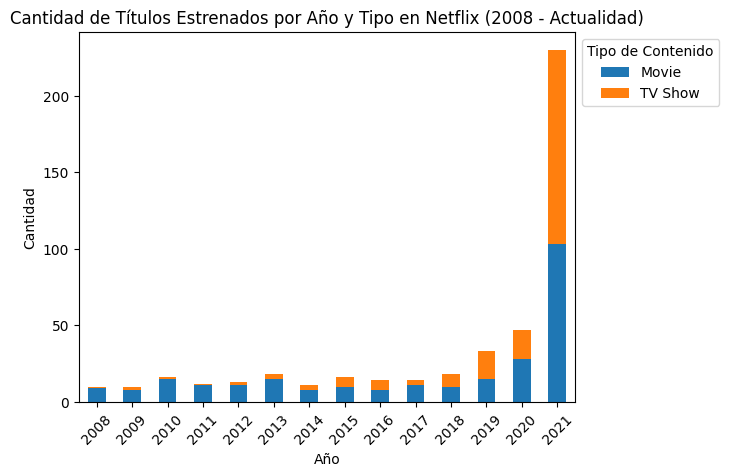

In [11]:
# I. Gráfico de barras apiladas por tipo y año
df_estrenos_anio_tipo = df[df['release_year'] >= 2008].groupby(['release_year', 'type']).size().unstack().fillna(0)
df_estrenos_anio_tipo.plot(kind='bar', stacked=True)
plt.title('Cantidad de Títulos Estrenados por Año y Tipo en Netflix (2008 - Actualidad)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Contenido', bbox_to_anchor=(1, 1))
plt.show()

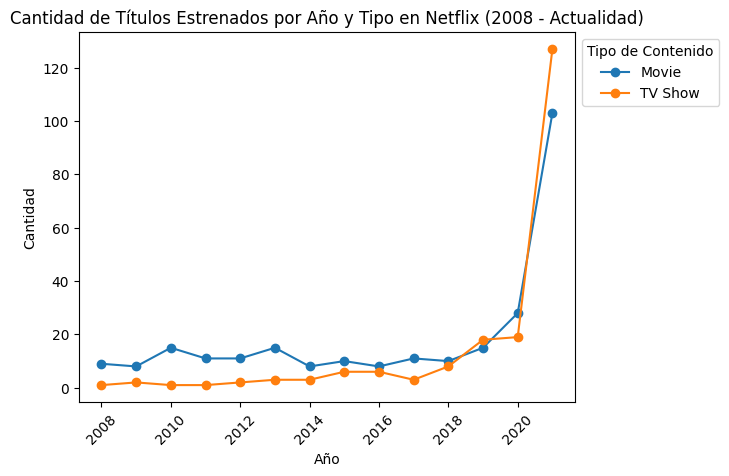

In [12]:
# II. Gráfico de líneas por tipo y año
df_estrenos_anio_tipo.plot(kind='line', marker='o')
plt.title('Cantidad de Títulos Estrenados por Año y Tipo en Netflix (2008 - Actualidad)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Contenido', bbox_to_anchor=(1, 1))
plt.show()

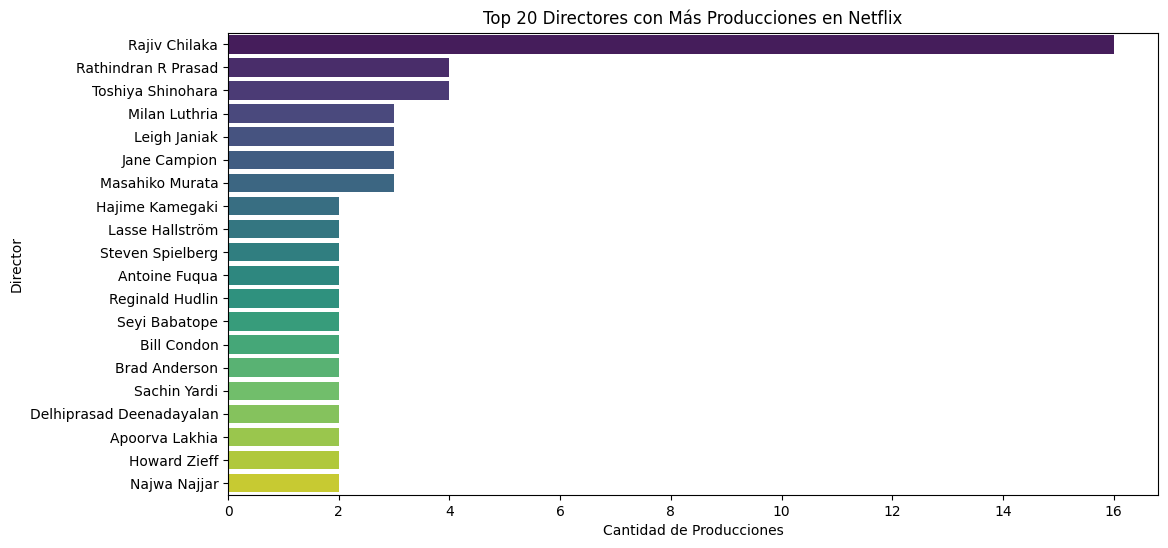

In [13]:
# i. Gráfico de directores con más producciones
top_directores = df['director'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directores.values, y=top_directores.index, palette='viridis')
plt.title('Top 20 Directores con Más Producciones en Netflix')
plt.xlabel('Cantidad de Producciones')
plt.ylabel('Director')
plt.show()

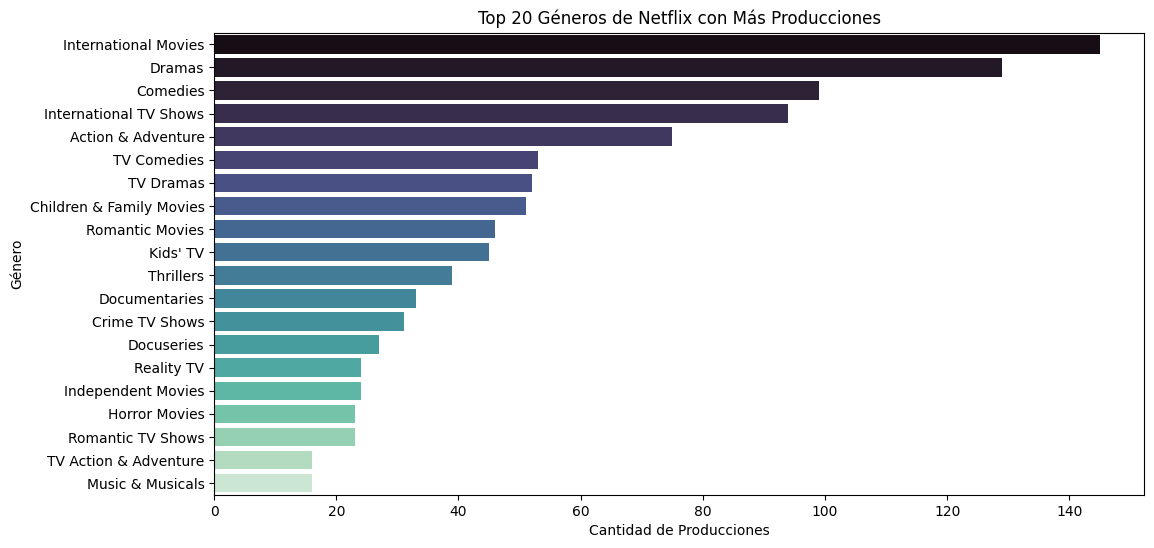

In [14]:
# ii. Gráfico de géneros con mayor cantidad de producciones
top_generos = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_generos.values, y=top_generos.index, palette='mako')
plt.title('Top 20 Géneros de Netflix con Más Producciones')
plt.xlabel('Cantidad de Producciones')
plt.ylabel('Género')
plt.show()

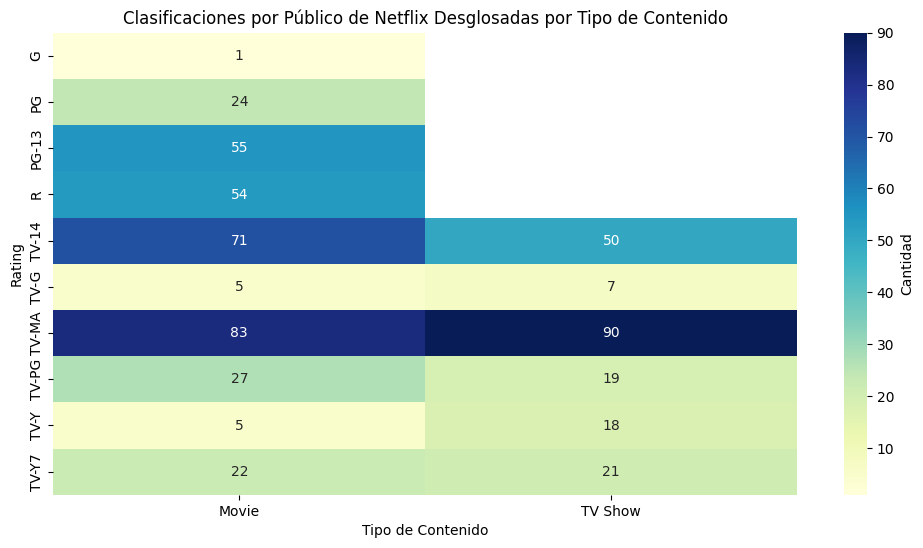

In [15]:
# iii. Gráfico de clasificaciones por público desglosando por tipo de contenido
clasificaciones_contenido = df.groupby(['rating', 'type']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(clasificaciones_contenido, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Cantidad'})
plt.title('Clasificaciones por Público de Netflix Desglosadas por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Rating')
plt.show()

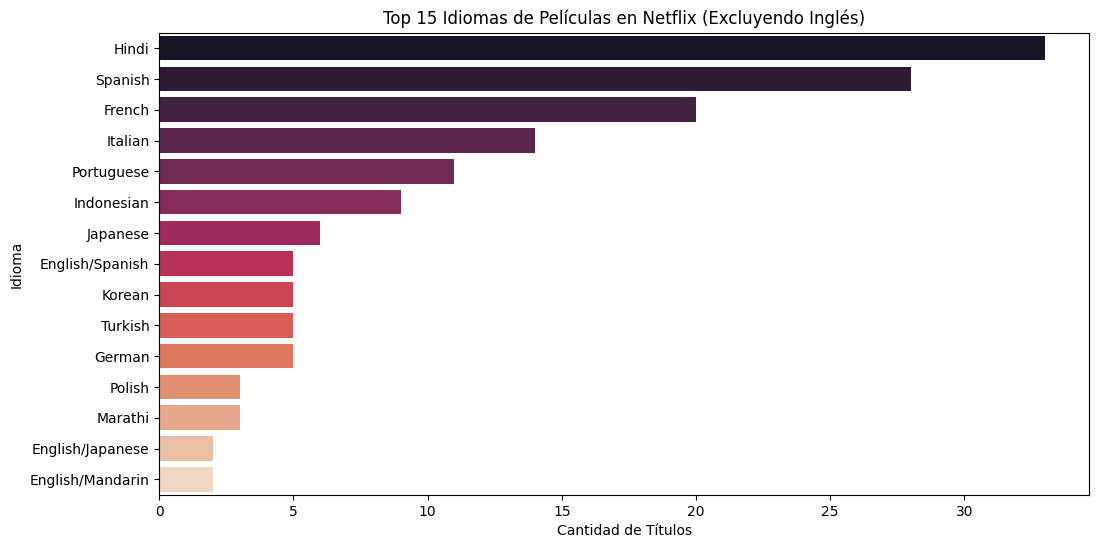

In [16]:
# iv. Gráfico de idiomas con mayor cantidad de títulos (sin contar inglés)
top_idiomas = df[df['language'] != 'English']['language'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_idiomas.values, y=top_idiomas.index, palette='rocket')
plt.title('Top 15 Idiomas de Películas en Netflix (Excluyendo Inglés)')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Idioma')
plt.show()